In [22]:
import math
import matplotlib.pyplot as plt
from scipy import stats
#assumtions:
    #assume laminar flow (Nre < 2000)
    #assume alpha = 1 (velocity profile at max)
    #assume v1 = 0 (very small flow at the start)
    #assume 1 bend for an empty bag

# variables:
g = 9.81              # gravity (m/s^2)
#q2 = 3.3333 * 10**-8  # flow rate going into baby(m^3/s)
d = 0.0011    # internal tube diameter for 5 French (m)
rho = 1035           # density of milk (kg/m^3)
l_total = 0.875       # total length of tube (m)
mu = 0.00584     # viscosity of milk (Pa*s)
#mu = 0.00444
h_full = 0.084        #height of fluid in syringe (m)
p0 = 0                # atmospheric gauge pressure 
p1 = p0 + rho*g*h_full
#h_diff = 0.15          #Height between top of syringe and bottom of tube -----> CHANGE
#p2 = rho*g*h_diff # pressure in baby's stomach (Pa)
bends = 0.00001

def get_flowrate(hf,bends):
    #v2 = (hf*rho*d**2)/(32*mu*l_total)
    v2 = 0
    a = bends
    b = 64*mu*l_total/(rho*d**2)
    c = -2*hf
    v2_1 = (-b + (b ** 2 - 4 * a * c) ** 0.5) / (2 * a)
    v2_2 = (-b - (b ** 2 - 4 * a * c) ** 0.5) / (2 * a)
    if v2_2>=v2_1:
        v2 = v2_2
    else:
        v2 = v2_1
    #v2 = (hf*rho*d**2)/(32*mu*l_total)
    flow_rate = v2*math.pi*(d/2)**2
    convertion_rate = 6*10**7
    return flow_rate*convertion_rate

def get_headloss_friction(h,h_diff):
    p2 = rho*g*h_diff # pressure in baby's stomach (Pa)
    hf = (g*h)-(p2-p1)/rho
    return hf

def plot_slope(x,y,ax):
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    def myfunc(x):
        return slope * x + intercept
    mymodel = list(map(myfunc, x))
    ax.plot(x,y)
    ax.plot(x, mymodel)
    return slope


#if __name__ == '__main__':
    #v2 = get_velocity_into_baby();


#SOLVE FOR 6.5 FRENCH:
    # print('\nSolved Heights for 6 French Tubing:')
    # # CASE 1: 1 Bend at mouth (90 degrees) (bag is empty)
    # hf1 = get_headloss_friction(get_velocity_into_baby(d_6French), k_bend_90deg, d_6French);
    # h_empty = get_height(hf1, 0, d_6French);
    # print('The height for an empty bag of feed should be', round(h_empty, 4), 'm above the baby\'s stomach')

    # #CASE 2: 2 Bends, one at mouth (90 degrees), one at 45 degree (bag is half empty)
    # hf2 = get_headloss_friction(get_velocity_into_baby(d_6French), k_bend_90deg + k_bend_45deg,d_6French);
    # h_semifull = get_height(hf2,p1_half_full,d_6French);
    # print('The height for a semi-full bag of feed should be', round(h_semifull, 4),'m above the baby\'s stomach')

    # #CASE 3: 2 Bends, one at mouth (90 degrees), one at 90 degree (bag is full)
    # hf3 = get_headloss_friction(get_velocity_into_baby(d_6French), k_bend_90deg + k_bend_90deg,d_6French);
    # h_fullbag = get_height(hf3, p1_full,d_6French);
    # print('The height for a full bag of feed should be', round(h_fullbag, 4), 'm above the baby\'s stomach')

hf = get_headloss_friction(0.204,0.1019)
print(hf)
flow_rate = get_flowrate(hf,0.0001)
print(flow_rate)

1.825641
0.7972540194996576


4.284008536329716
[1.6450592559104071, 1.4308589425361464, 1.2166584671015643, 1.0024581537273038, 0.7882575162323995]


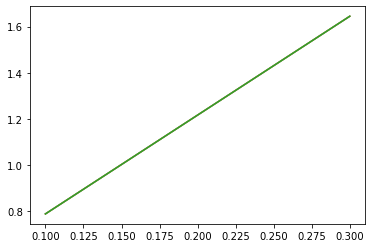

In [2]:
#Solve for 0 pressure
hf1_10 = get_headloss_friction(0.1,0)
hf1_15 = get_headloss_friction(0.15,0)
hf1_20 = get_headloss_friction(0.2,0)
hf1_25 = get_headloss_friction(0.25,0)
hf1_30 = get_headloss_friction(0.3,0)
flow_rate_10 = get_flowrate(hf1_10,bends)
flow_rate_15 = get_flowrate(hf1_15,bends)
flow_rate_20 = get_flowrate(hf1_20,bends)
flow_rate_25 = get_flowrate(hf1_25,bends)
flow_rate_30 = get_flowrate(hf1_30,bends)
x = [0.30, 0.25,0.2,0.15,0.10]
avg_flowrate = [flow_rate_30,flow_rate_25,flow_rate_20,flow_rate_15,flow_rate_10]
fig1, ax1 = plt.subplots(1,1)
ax1.plot(x,avg_flowrate)
regres_slope = plot_slope(x,avg_flowrate,ax1)
print(regres_slope)
print(avg_flowrate )

4.2840076223095
[2.41618055260048, 2.2019801825051064, 1.9877798026861142, 1.7735794196259154, 1.5593790284627005]


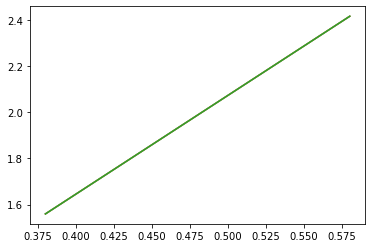

In [3]:
#Solve for 10 pressure
bends = 0.001
height_diff = 0.1
hf1_38 = get_headloss_friction(0.38,height_diff)
hf1_43 = get_headloss_friction(0.43,height_diff)
hf1_48 = get_headloss_friction(0.48,height_diff)
hf1_53 = get_headloss_friction(0.53,height_diff)
hf1_58 = get_headloss_friction(0.58,height_diff)
flow_rate_38 = get_flowrate(hf1_38,bends)
flow_rate_43 = get_flowrate(hf1_43,bends)
flow_rate_48 = get_flowrate(hf1_48,bends)
flow_rate_53 = get_flowrate(hf1_53,bends)
flow_rate_58 = get_flowrate(hf1_58,bends)
x = [0.58, 0.53,0.48,0.43,0.38]
avg_flowrate = [flow_rate_58,flow_rate_53,flow_rate_48,flow_rate_43,flow_rate_38]
fig1, ax1 = plt.subplots(1,1)
ax1.plot(x,avg_flowrate)
regres_slope = plot_slope(x,avg_flowrate,ax1)
print(regres_slope)
print(avg_flowrate )

    #SLOPE does NOT change with higher pressure, it is instead the y axis that moves up and down

NameError: name 'regres_slope_model' is not defined

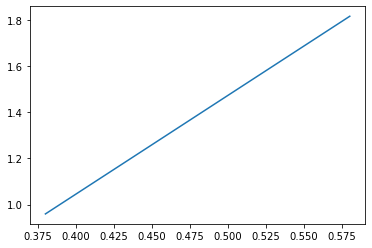

In [28]:
#Solve for 24 pressure
bends =0.001
height_diff  = 0.24
hf1_38 = get_headloss_friction(0.38,height_diff)
hf1_43 = get_headloss_friction(0.43,height_diff)
hf1_48 = get_headloss_friction(0.48,height_diff)
hf1_53 = get_headloss_friction(0.53,height_diff)
hf1_58 = get_headloss_friction(0.58,height_diff)
flow_rate_38 = get_flowrate(hf1_38,bends)
flow_rate_43 = get_flowrate(hf1_43,bends)
flow_rate_48 = get_flowrate(hf1_48,bends)
flow_rate_53 = get_flowrate(hf1_53,bends)
flow_rate_58 = get_flowrate(hf1_58,bends)
x = [0.58, 0.53,0.48,0.43,0.38]
avg_flowrate = [flow_rate_58,flow_rate_53,flow_rate_48,flow_rate_43,flow_rate_38]
fig1, ax1 = plt.subplots(1,1)
ax1.plot(x,avg_flowrate)
regres_slope = plot_slope(x,avg_flowrate,ax1)
print(regres_slope)
print(avg_flowrate )


-Observations:
-SLOPE does NOT change depending on head pressure, only the Y intercept
-OK BUT WHY is the one with a pressure head having a much higher affect
-SET SOME EXPERIMENTS UP ON HOW TF TO MAKE SURE HEIGHT ALWAYS DOES NOT CHANGE
-BUT WHEN U ADD BENDS - AFFECTS SLOPE AND Y AXIS LOL

MORE EXPERIMENTS:

SOME METHOD OF MAKING SURE THE HEIGHT IT FIXED - NOT VARIABLE AT ALL BRO
-NOT JUST APPROXIMATING THE HEIGHT!!!!!!!!
5 x 5 - time 2 minutes!!!!

VERY CONTROLLED NO CM:
10 x 5
15 x 5
20 x 5
25 x 5
30 x 5

VERY CONTROLLED 15 CM:
28 X 5
38 X 5
48 X 5
58 X 5
68 X 5

5 X 3 MILK 48
5 X 3 MILK 28

VERY CONTROLLED 30 CM:
28 X 5
38 X 5
48 X 5
58 X 5
68 X 5

5 X 3 MILK 68